In [1]:
import copy

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("data/iris/iris.data", header=None)
X, y = data.iloc[:,:4].values, pd.get_dummies(data.iloc[:,4:], dtype='int').values

In [5]:
X, y = torch.tensor(X, dtype=torch.float32),torch.tensor(y, dtype=torch.float32)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [50]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.op = nn.Linear(8, 3)

    def forward(self, x):
        return self.op(self.act(self.h1(x)))

# Define the model
model = Model()

# Loss, Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [52]:
batch_size = 5
epochs = 200

train_loss_hist = []
train_acc_hist = []

test_loss_hist = []
test_acc_hist = []

batches = len(X_train)//batch_size

for epoch in range(epochs):

    batch_losses = []
    batch_accs = []

    model.train()
    for i in range(batches):

        start = i * batch_size
        end = start + batch_size
        
        Xb = X_train[start:end]
        Yb = y_train[start:end]

        # prediction on train
        yb_pred = model(Xb)
        loss = loss_fn(yb_pred, Yb)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (torch.argmax(yb_pred, 1) == torch.argmax(Yb, 1)).float().mean()
        
        batch_losses.append(loss.detach().numpy())
        batch_accs.append(acc.detach().numpy())


    model.eval()
    
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, y_test).detach().numpy()
    
    test_acc = (torch.argmax(y_test_pred, 1) == torch.argmax(y_test, 1))\
        .float().mean()
    
    train_loss = np.mean(batch_losses)
    train_acc = np.mean(batch_accs)

    

    train_loss_hist.append(train_loss)
    test_loss_hist.append(test_loss)

    train_acc_hist.append(train_acc)
    test_acc_hist.append(test_acc.detach().numpy())

   # print(f'Train Loss: {train_loss} ; Test Loss: {test_loss.detach().numpy()} ; Train Acc: {train_acc} ; Test Loss: {test_acc.detach().numpy()}')a

In [53]:
test_loss_hist[:10]

[array(0.7511861, dtype=float32),
 array(0.5606345, dtype=float32),
 array(0.4468991, dtype=float32),
 array(0.35933197, dtype=float32),
 array(0.29223263, dtype=float32),
 array(0.2418998, dtype=float32),
 array(0.20338552, dtype=float32),
 array(0.17265381, dtype=float32),
 array(0.14836906, dtype=float32),
 array(0.12912926, dtype=float32)]

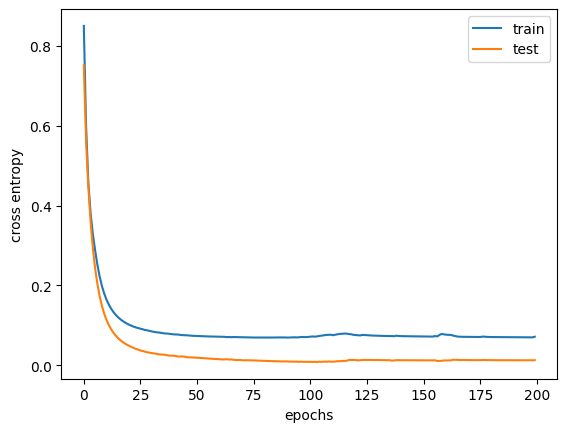

In [55]:
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

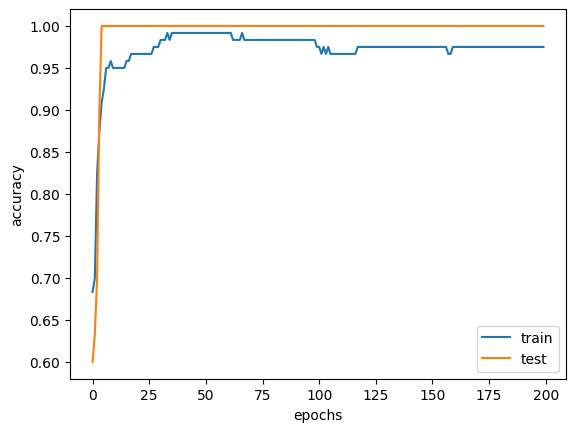

In [56]:
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()